# Logsitic Regression Exercise: 
## Classification of *Senecio* ecotypes

<img src="senecio.png" alt="drawing" width="400"/>

In this exercise we will be exploring how well we can predict *Senecio* ecotypes based on various morphological features. The data is taken from an experiment where seeds from the Australian wildflower *Senecio lautus* were collected, grown in glasshouses under uniform conditions, and a range of morphological traits measured. The seeds were collected from populations belonging to four distinct ecotypes (dune, headland, tableland and woodland) that may be in the process of forming separate species. 
###### Walter, G.M., Aguirre, J.D., Blows, M.W. & Ortiz-Barrientos, D. Evolution of Genetic Variance during Adaptive Radiation. The American Naturalist 191: E108–E128 (2018), https://www.journals.uchicago.edu/doi/10.1086/696123

The dataset consists of the following features:

- **Ecotype**: One of four ecotypes

- **Population**: Population ID

- **VegHeight**: Vegetative height of the plant, in mm

- **MSL_W**: Ratio between main stem length and mean plant width

- **SB**: Number of branches

- **MSD**: Main stem diameter, in mm

- **Area**: Leaf area, in mm2

- **P2A2**: Leaf perimeter squared / area squared (an indicator of leaf complexity)

- **Circularity**: Leaf circularity

- **Nindents.Peri**: Number of leaf indents divided by leaf perimeter

- **IndentWidth**: Leaf indent width, in mm

- **IndentDepth**: Leaf indent depth, in mm

### Libraries
**Import whichever libraries you think you will need.**

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Import and inspect data
**Read in the ecotype-OB.csv file and set it to a dataframe called eco.**

In [3]:
eco = pd.read_csv("ecotype-OB.csv")

**Check the head of eco.**

In [4]:
eco.head()

,Ecotype,Population,VegHeight,MSL_W,SB,MSD,Area,P2A2,Circularity,Nindents.Peri,IndentWidth,IndentDepth
0,Dune,D0,354,0.459259,16,4.31,613.468135,0.159502,37.157379,0.110202,5.127754,1.202011
1,Dune,D0,317,0.318421,16,4.58,321.366835,0.220129,51.482505,0.165806,4.075965,0.765863
2,Dune,D0,309,0.389542,16,5.09,438.073814,0.164009,35.246350,0.118369,6.221302,1.583950
3,Dune,D0,327,0.538593,15,4.68,447.911864,0.186158,31.049993,0.087966,7.599282,1.392852
4,Dune,D0,376,0.463811,17,4.65,406.741222,0.287131,64.196189,0.133058,4.365729,1.163325


**Use .info and .describe to familiarise yourself with the data.**

In [5]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ecotype        242 non-null    object 
 1   Population     242 non-null    object 
 2   VegHeight      242 non-null    int64  
 3   MSL_W          242 non-null    float64
 4   SB             242 non-null    int64  
 5   MSD            242 non-null    float64
 6   Area           242 non-null    float64
 7   P2A2           242 non-null    float64
 8   Circularity    242 non-null    float64
 9   Nindents.Peri  242 non-null    float64
 10  IndentWidth    242 non-null    float64
 11  IndentDepth    242 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 22.8+ KB


In [6]:
eco.describe()

,VegHeight,MSL_W,SB,MSD,Area,P2A2,Circularity,Nindents.Peri,IndentWidth,IndentDepth
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,314.851240,0.425043,18.979339,4.705165,659.058811,1.995128,39.252759,0.120225,6.351858,1.423328
std,187.429994,0.297256,4.757565,1.715825,557.300897,4.218670,19.740429,0.048322,2.483273,0.824089
min,48.000000,0.093897,11.000000,2.280000,85.203908,0.018914,5.151790,0.034473,2.989294,0.417800
25%,178.000000,0.217928,16.000000,3.390000,263.093258,0.071532,26.148567,0.079333,4.464365,0.902156
50%,287.000000,0.315006,18.000000,4.305000,449.233075,0.145249,43.430832,0.122888,5.693947,1.261712
75%,389.250000,0.545932,21.000000,5.715000,841.060949,0.715510,52.140638,0.155904,7.467736,1.730248
max,998.000000,1.593103,36.000000,9.970000,2872.412321,25.268059,90.675381,0.241897,13.862200,6.064009


**Because this is a logistic regression based classification problem we will restrict ourselves the two most dominant ecotypes: "Dune" and "Headland". Make a new dataframe `ecosub` that only includes the "Dune" and "Headland" ecotypes.**

In [10]:
ecosub = eco[(eco['Ecotype'] == 'Dune') | (eco['Ecotype'] == 'Headland')]

In [12]:
ecosub.head()

,Ecotype,Population,VegHeight,MSL_W,SB,MSD,Area,P2A2,Circularity,Nindents.Peri,IndentWidth,IndentDepth
0,Dune,D0,354,0.459259,16,4.31,613.468135,0.159502,37.157379,0.110202,5.127754,1.202011
1,Dune,D0,317,0.318421,16,4.58,321.366835,0.220129,51.482505,0.165806,4.075965,0.765863
2,Dune,D0,309,0.389542,16,5.09,438.073814,0.164009,35.246350,0.118369,6.221302,1.583950
3,Dune,D0,327,0.538593,15,4.68,447.911864,0.186158,31.049993,0.087966,7.599282,1.392852
4,Dune,D0,376,0.463811,17,4.65,406.741222,0.287131,64.196189,0.133058,4.365729,1.163325


### Data exploration

**Use seaborn to make a pairplot of the ecosub datset with a different colour for ecotype.**

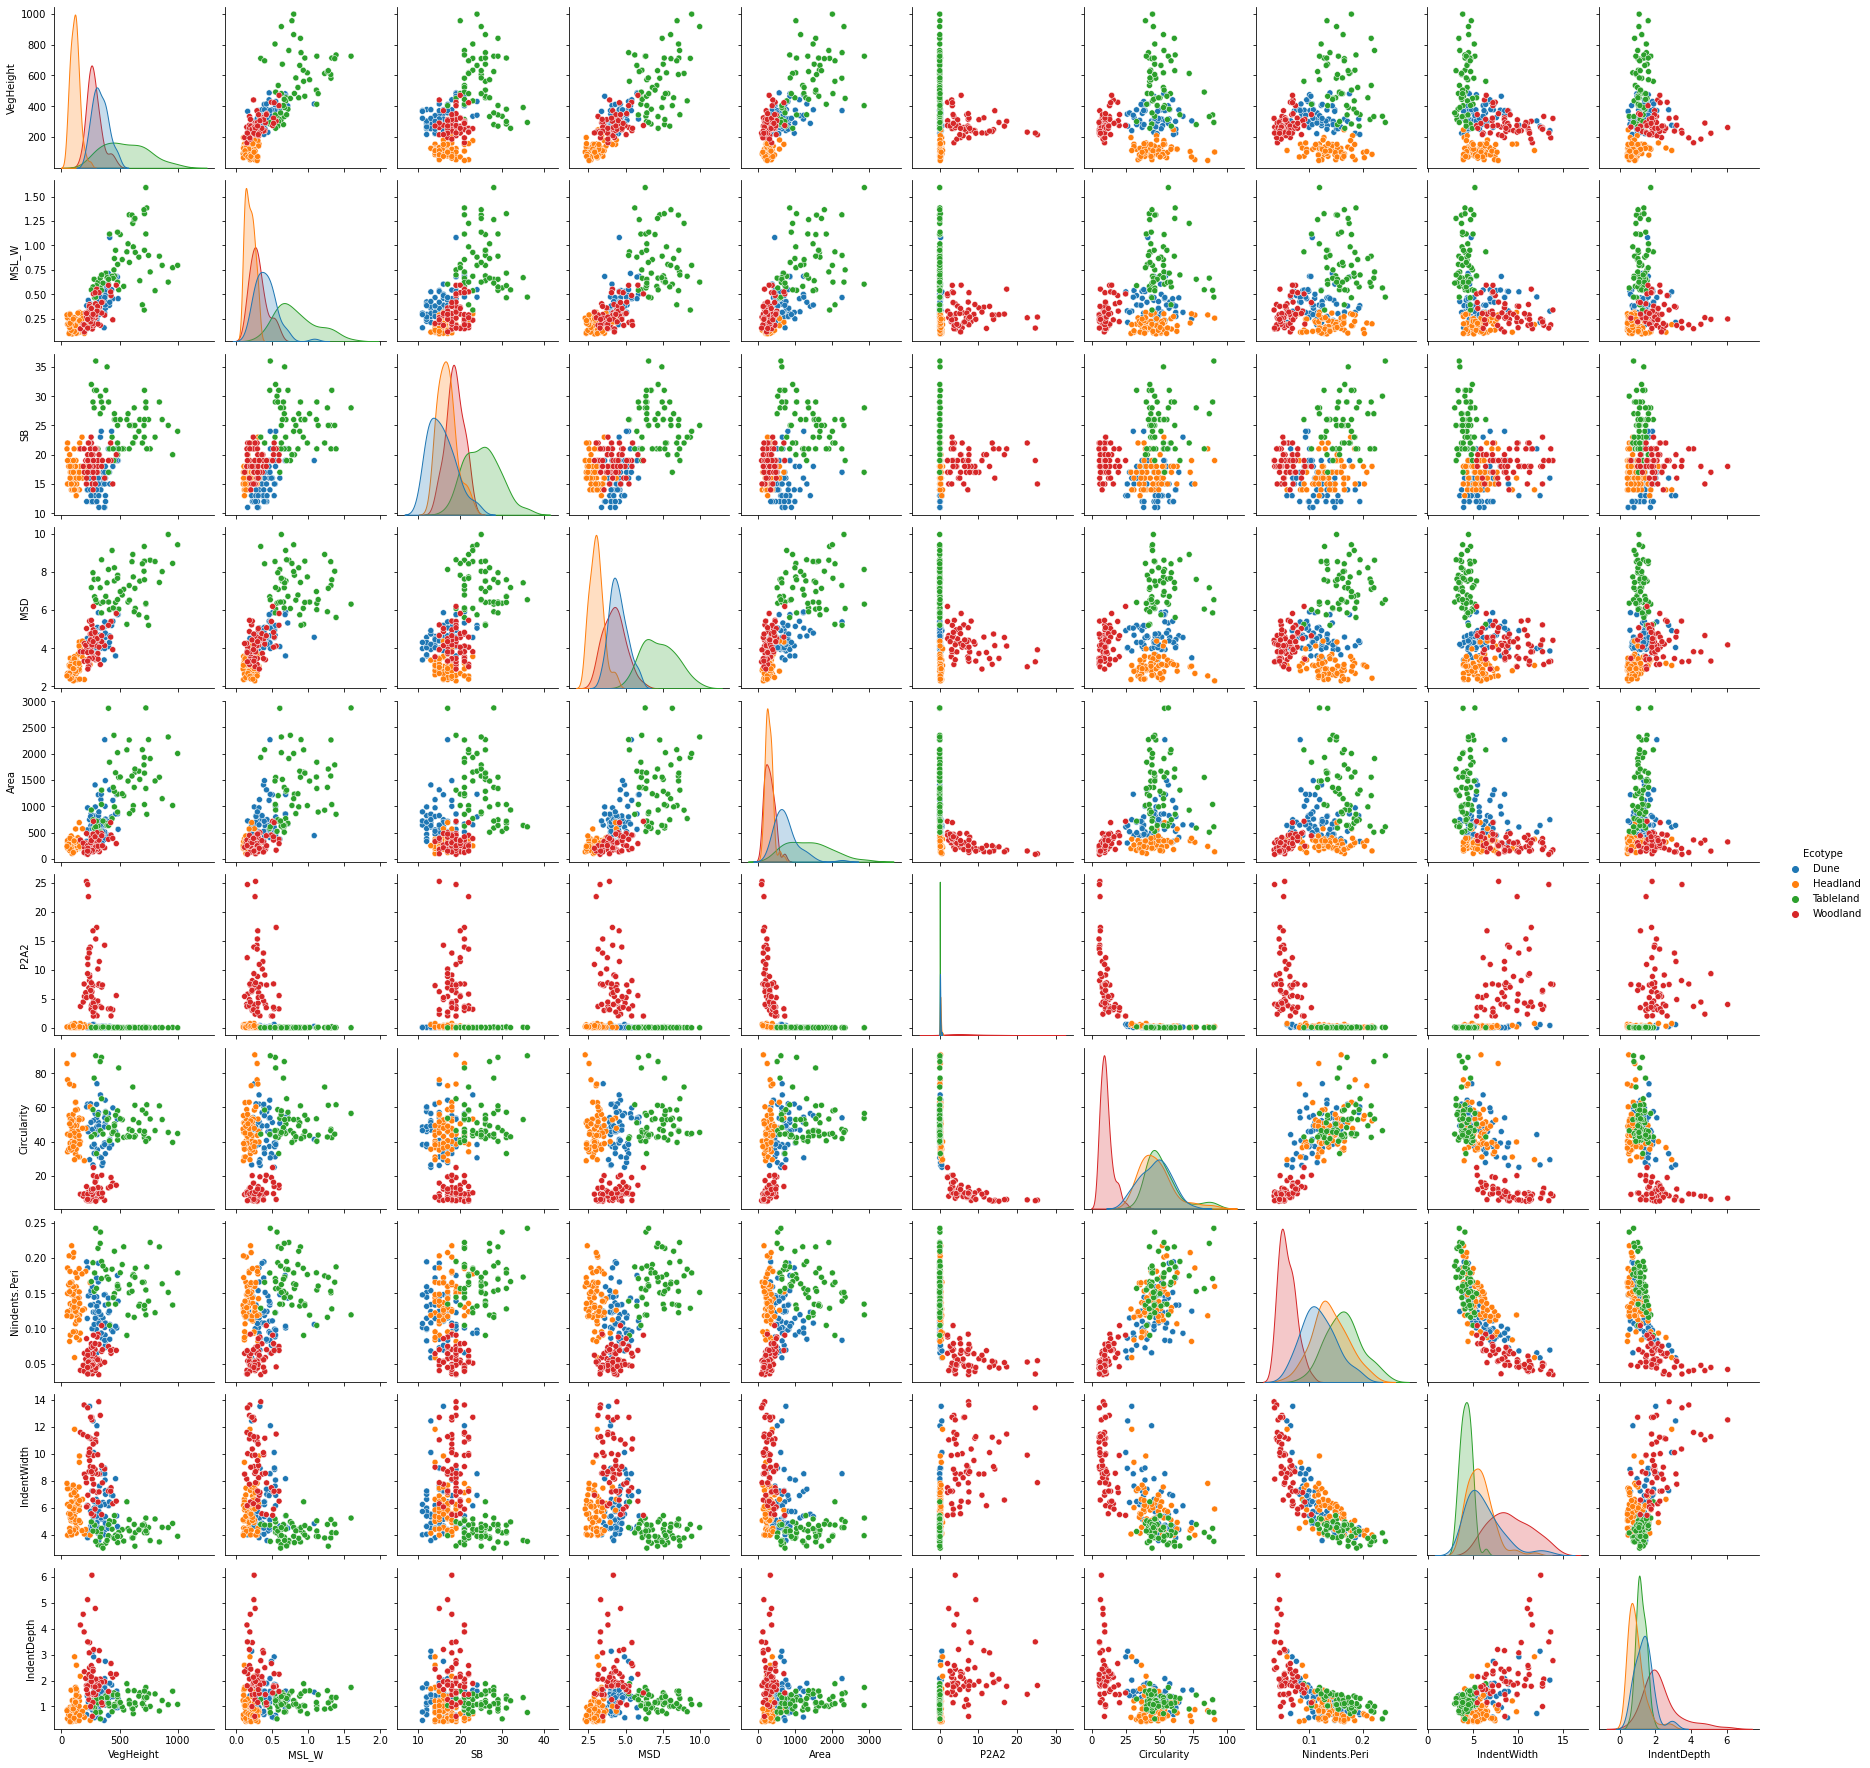

In [15]:
sns.pairplot(eco, hue = "Ecotype")

**Generate a heatmap showing the correlation between the dataset features.**

<AxesSubplot:>

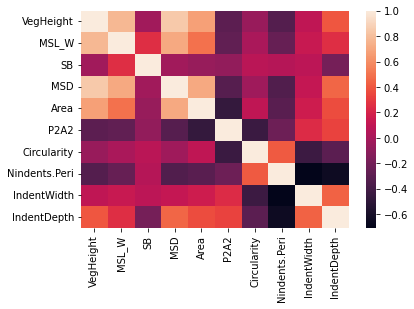

In [16]:
sns.heatmap(ecosub.corr())

### Model training
**Seperate the dataset into label and features arrays (only use one feature)**

In [17]:
y = ecosub['Ecotype']
X = ecosub['MSD']

**Split into training and test data using train_test_split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Import logistic regression from sklearn and fit model on training data**

In [24]:
from sklearn.linear_model import LogisticRegression

**Predict values from the test data**

**Generate a classfication report and confusion matrix**

**Plot the estimate probabilities as we did for the Palmer penguins dataset (code provided but at the very least you will likely need to modify the range of X_new in `np.linspace()`**

In [ ]:
X_new = np.linspace(2,6,1000).reshape(-1,1) #  columns
y_proba = logmodel.predict_proba(X_new)
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", label = "Dune")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Headland")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot(X_train[y==0], y_train[y==0], "bs")
plt.plot(X_train[y==1], y_train[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("MSD", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([2, 6, -0.02, 1.02])

**Generate ROC curve**

**Find optimum decision boundary**

## Good work!